# Remove labels on image edges
When analysing image scientifically, it is often relevant that only object in the image are analyzed that are fully captured. 

In [1]:
import pyclesperanto_prototype as cle
from skimage.segmentation import clear_border, relabel_sequential
from skimage.io import imread
import stackview
import numpy as np

Our starting point shall be a label image; for example derived from blobs.tif through thresholding and connected component labeling:

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:34: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


cl.OCLArray([[ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
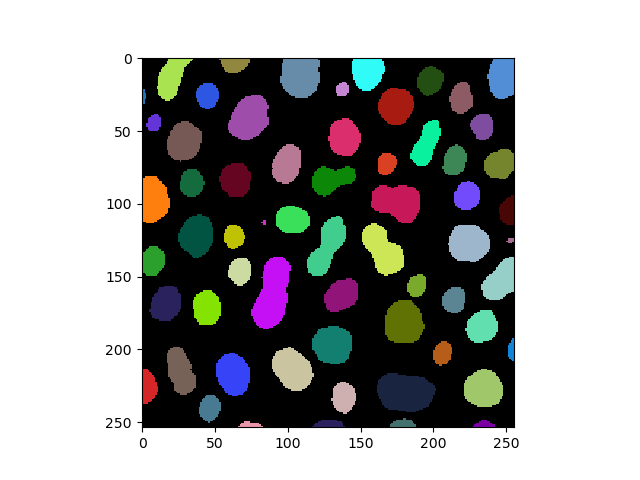

In [2]:
# load data
image = imread('../../data/blobs.tif')

# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
labeled

In [3]:
num_labels = len(np.unique(labeled)) - 1
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62


In case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
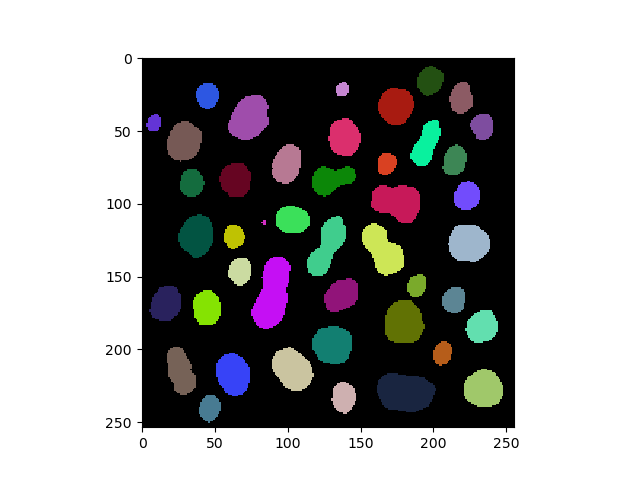

In [4]:
labels_excl_edges = clear_border(np.asarray(labeled))

stackview.insight(labels_excl_edges)

Note that the maximum intensity in the label image above is 55 and the number of objects is 44 (see below). Thus, this is a label image where not all labels between 1 and 44 are present.

In [5]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 44


## Subsequently labeling
Many algorithms for further processing of label images required that labels are subsequently labeled. Thus, we need to fix this with the image above.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
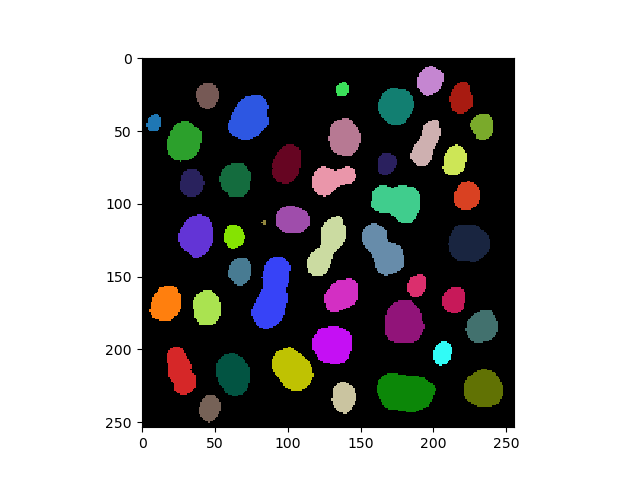

In [6]:
relabeled, _, _ = relabel_sequential(labels_excl_edges)

stackview.insight(relabeled)

Other implementations for removing objects on image edges do not require this step:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
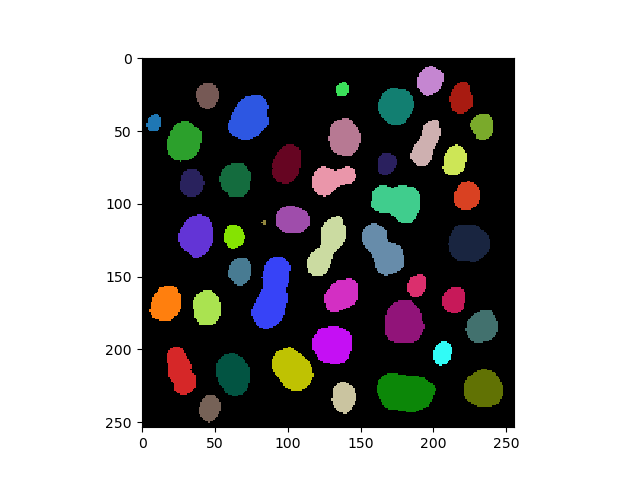

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)

labels_excl_edges

In [8]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 44
